In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls

KeyboardInterrupt: ignored

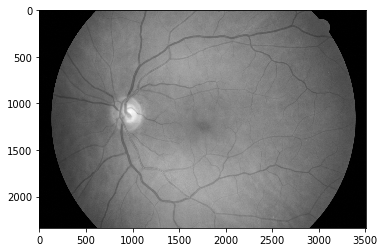

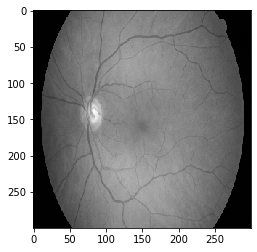

In [0]:
# Just for testing
# Prepare model
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/My Drive/GlaucomaTrainingImages"

CATEGORIES = ["Glaucoma_", "Healthy_"]

for category in CATEGORIES:  # do glaucoma and healthy
    path = os.path.join(DATADIR, category)  # create path to glaucoma and healthy
    for img in os.listdir(path):  # iterate over each image per glaucoma and healthy
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

        break  
    break  

# Resize images
IMG_SIZE = 300

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [0]:
# Prepare model
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pickle

DATADIR = "/content/drive/My Drive/GlaucomaTrainingImages"

CATEGORIES = ["Glaucoma_", "Healthy_"]

# Get training data ready
training_data = []
IMG_SIZE = 224

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  # create path to glaucoma and healthy images
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=glaucoma 1=healthy

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

# Randomize order of data
random.shuffle(training_data)

# Label each training image with the correct label (0 or 1)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
# Store data using pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


100%|██████████| 330/330 [03:20<00:00,  2.48it/s]


663


In [0]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.callbacks import History 
history = History()

vgg16_model = keras.applications.vgg16.VGG16()
DATADIR = "/content/drive/My Drive/GlaucomaTrainData"
valDIR = "/content/drive/My Drive/GlaucomaValidationImages"
testDIR = "/content/drive/My Drive/GlaucomaTestingImages/"
train_data = ImageDataGenerator().flow_from_directory(DATADIR, target_size=(224,224), color_mode = "rgb",
                                                         classes =['GlaucomaTrain','HealthyTrain'], batch_size=1, class_mode='binary')
val_data = ImageDataGenerator().flow_from_directory(valDIR, target_size=(224,224), color_mode = "rgb",
                                                         classes =['GlaucomaVal','HealthyVal'], batch_size=1, class_mode='binary')

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_data, 
                    steps_per_epoch=10, 
                    validation_data = val_data,
                    validation_steps = 10,
                    epochs=20,
                    verbose=2)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Epoch 1/50


KeyboardInterrupt: ignored

In [0]:
# Training the model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

# Load data from pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

# Try out different settings to see which ones are best

NAME = "VGG16-20epochs"
print(NAME)

vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'],
#               )

model.fit(X, y,
          batch_size=32,
          epochs=20,
          validation_split=0.3,
          shuffle=False,
          callbacks=[tensorboard])
model.save('20epochsVGG16.model')

VGG16-20epochs
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
553467904/553467096 [==============================] - 6s 0us/step
Train on 464 samples, validate on 199 samples
Epoch 1/20
464/464 [==============================] - 330s 711ms/sample - loss: 0.7431 - acc: 0.5323 - val_loss: 0.7085 - val_acc: 0.4975
Epoch 2/20
464/464 [==============================] - 330s 710ms/sample - loss: 0.7147 - acc: 0.5000 - val_loss: 0.6881 - val_acc: 0.5377
Epoch 3/20
464/464 [==============================] - 331s 712ms/sample - loss: 0.7079 - acc: 0.4828 - val_loss: 0.6753 - val_acc: 0.5829
Epoch 4/20
464/464 [==============================] - 329s 710ms/sample - loss: 0.6887 - acc: 0.5453 - val_loss: 0.6748 - val_acc: 0.5980
Epoch 5/20
464/464 [==============================] - 330s 711ms/sample - loss: 0.6889 - acc: 0.5647 - val_loss: 0.6731 - val_acc: 0.5980
Epoch 6/20
464/464 [==============================] - 330s 710ms/sample - loss: 0.6885 - acc: 0.5409 

In [0]:
%reload_ext tensorboard
%tensorboard --logdir logs/d

In [0]:
# Test multiple images
import cv2
import tensorflow as tf
import os
from imutils import paths

TEST_PATH = "/content/drive/My Drive/GlaucomaTestingImages"
TEST_CATEGORIES = ["GlaucomaTest", "HealthyTest"]
model = tf.keras.models.load_model("20epochsVGG16.model")

testImagePaths = list(paths.list_images(TEST_PATH))

def prepare(filepath):
    IMG_SIZE = 224  # 50 in txt-based
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

random.shuffle(testImagePaths)
testLabels = []
for image in testImagePaths:
  # extract the class label from the filename
  label = image.split(os.path.sep)[-2]
  testLabels.append(label)

count = 0
numCorrect = 0
numFalseNegatives = 0
numFalsePositives = 0
while count < len(testImagePaths):
  for imgPath in testImagePaths:
    prediction = model.predict([prepare(imgPath)])
    predicted_category = TEST_CATEGORIES[int(prediction[0][0])]
    print("predicted: ", predicted_category, " actual: ", testLabels[count])
    if predicted_category == testLabels[count]:
      numCorrect += 1
    if predicted_category == "GlaucomaTest" and testLabels[count] == "HealthyTest":
      numFalsePositives += 1
    if predicted_category == "HealthyTest" and testLabels[count] == "GlaucomaTest":
      numFalseNegatives += 1
    count += 1
print(numCorrect, "/", len(testImagePaths), " False positives: ", numFalsePositives, " False Negatives: ", numFalseNegatives)

predicted:  GlaucomaTest  actual:  GlaucomaTest
predicted:  GlaucomaTest  actual:  GlaucomaTest
predicted:  GlaucomaTest  actual:  HealthyTest
predicted:  GlaucomaTest  actual:  HealthyTest
predicted:  GlaucomaTest  actual:  GlaucomaTest
predicted:  GlaucomaTest  actual:  GlaucomaTest
predicted:  GlaucomaTest  actual:  GlaucomaTest
predicted:  GlaucomaTest  actual:  HealthyTest
predicted:  GlaucomaTest  actual:  HealthyTest
predicted:  GlaucomaTest  actual:  HealthyTest
predicted:  GlaucomaTest  actual:  GlaucomaTest
